In [1]:
!pip install recommenders

     |████████████████████████████████| 339 kB 2.5 MB/s eta 0:00:01
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 5.8 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 47.6 MB/s eta 0:00:01
     |████████████████████████████████| 771 kB 22.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 116 kB/s eta 0:00:01
     |████████████████████████████████| 122 kB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 310 kB 27.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 58.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 118 kB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 70.9 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 26.4 MB/s

     |████████████████████████████████| 3.8 MB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 1.1 MB/s eta 0:00:01
  Using cached mypy_extensions-0.4.3-py2.py3-none-any.whl (4.5 kB)
     |████████████████████████████████| 532 kB 36.1 MB/s eta 0:00:01
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Created wheel for lightfm: filename=lightfm-1.16-cp38-cp38-macosx_10_9_x86_64.whl size=446310 sha256=03910d0f07dbba4f5ec2e50083a1fd24014c13d4f0e5fe2fbc061df629215332
  Stored in directory: /Users/zeba/Library/Caches/pip/wheels/ec/bb/51/9c487d021c1373b691d13cadca0b65b6852627b1f3f43550fa
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-macosx_10_9_x86_64.whl size=1180300 sha256=850ff5ee74a293a874f797ab14e0d26b62f70e76b9b25080fe9015540ce4f53d
  Stored in directory: /Users/zeba/Library/Caches/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built lightfm scikit-surprise
  Attempting uninstall: 

In [2]:
import os

from recommenders.models.newsrec.newsrec_utils import get_mind_data_set
from recommenders.models.deeprec.deeprec_utils import download_deeprec_resources
from tempfile import TemporaryDirectory

In [3]:
MIND_VERSION = 'demo'

In [4]:
mind_url, mind_train_dataset, mind_dev_dataset, mind_utils = get_mind_data_set(MIND_VERSION)

In [5]:
tmpdir = TemporaryDirectory()
data_path = tmpdir.name

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')

valid_news_file = os.path.join(data_path, 'valid', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'valid', r'behaviors.tsv')

if not os.path.exists(train_news_file):
    download_deeprec_resources(mind_url, os.path.join(data_path, 'train'), mind_train_dataset)
    
if not os.path.exists(valid_news_file):
    download_deeprec_resources(mind_url, \
                               os.path.join(data_path, 'valid'), mind_dev_dataset)

100%|█████████████████████████████████████| 17.0k/17.0k [00:10<00:00, 1.67kKB/s]
100%|█████████████████████████████████████| 9.84k/9.84k [00:03<00:00, 2.65kKB/s]


In [7]:
import pandas as pd

behaviors_col_names = ['ImpressionID', 'UserID', 'Time', 'History', 'Impressions']

train_data = pd.read_table(train_behaviors_file, header=None, names=behaviors_col_names)
valid_data = pd.read_table(valid_behaviors_file, header=None, names=behaviors_col_names)

def data_to_recommended_and_selected(dataframe: pd.DataFrame, user_col: str = 'UserID', interactions_col: str = 'Impressions'):
    data = list()
    items = set()
    for user, user_interactions in zip(dataframe[user_col].values, dataframe[interactions_col].values):
        
        # Interações são da forma noticia_id-clicado, exemplo: N23699-0 N21291-0 N1901-1 N27292-0 N17443-0

        R = [interaction.split('-')[0] for interaction in user_interactions.split()] 
        S = [interaction.split('-')[0] for interaction in user_interactions.split() if interaction[-1] == '1']
        
        items.update(R)

        data.append((user, ' '.join(R), ' '.join(S)))

    return pd.DataFrame(data, columns=['UserID', 'R', 'S']), items

train_data, train_items = data_to_recommended_and_selected(train_data)
valid_data, valid_items = data_to_recommended_and_selected(valid_data)

In [8]:
train_data

,UserID,R,S
0,U82271,N13390 N7180 N20785 N6937 N15776 N25810 N20820...,N15368
1,U84185,N13089 N18101 N1248 N26273 N12770 N1132 N13649,N12770
2,U11552,N18390 N10537 N23967,N23967
3,U68381,N15660 N18609 N2831 N5677 N19010 N1502 N19215 ...,N18390
4,U52303,N15645 N7911,N7911
...,...,...,...
22029,U69508,N16297 N15645 N20630 N10602 N27294 N24649 N129...,N9916
22030,U79085,N27355 N9809 N20882 N8787 N25926 N3864 N15163 ...,N13282
22031,U46989,N13316 N23592 N10240 N1994 N26998 N17157 N1324...,N13247
22032,U49050,N23982 N17424 N17157 N4324 N22216 N14332 N6221...,N13557 N7050 N18892


# MIND Small

In [ ]:
import pandas as pd


In [26]:
data_path = '../MIND-small'

train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'behaviors.tsv')

valid_news_file = os.path.join(data_path, 'dev', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'dev', r'behaviors.tsv')

In [27]:
behaviors_col_names = ['ImpressionID', 'UserID', 'Time', 'History', 'Impressions']

train_data = pd.read_table(train_behaviors_file, header=None, names=behaviors_col_names)
valid_data = pd.read_table(valid_behaviors_file, header=None, names=behaviors_col_names)

def data_to_recommended_and_selected(dataframe: pd.DataFrame, user_col: str = 'UserID', interactions_col: str = 'Impressions'):
    data = list()
    items = set()
    for user, user_interactions in zip(dataframe[user_col].values, dataframe[interactions_col].values):
        
        # Interações são da forma noticia_id-clicado, exemplo: N23699-0 N21291-0 N1901-1 N27292-0 N17443-0

        R = [interaction.split('-')[0] for interaction in user_interactions.split()] 
        S = [interaction.split('-')[0] for interaction in user_interactions.split() if interaction[-1] == '1']
        
        items.update(R)

        data.append((user, ' '.join(R), ' '.join(S)))

    return pd.DataFrame(data, columns=['UserID', 'R', 'S']), items

train_data, train_items = data_to_recommended_and_selected(train_data)
valid_data, valid_items = data_to_recommended_and_selected(valid_data)

<AxesSubplot:ylabel='Frequency'>

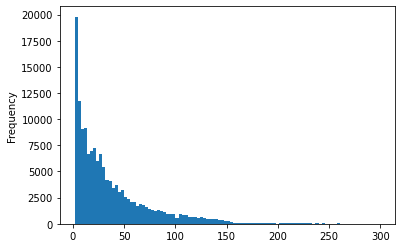

In [43]:
train_data['R'].apply(lambda x: len(x.split(' '))).plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

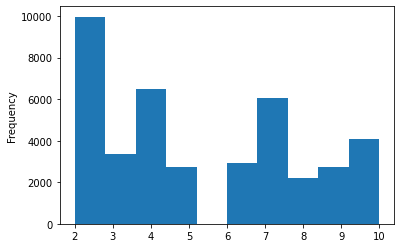

In [52]:
tst_s = train_data['R'].apply(lambda x: len(x.split(' ')))
tst_s[tst_s <= 10].plot.hist()

<AxesSubplot:ylabel='Frequency'>

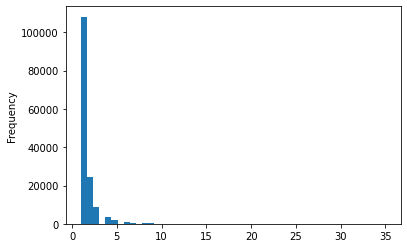

In [41]:
train_data['S'].apply(lambda x: len(x.split(' '))).plot.hist(bins=50)

In [42]:
train_data['S'].apply(lambda x: len(x.split(' '))).describe()

count    149116.000000
mean          1.506827
std           1.153562
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          35.000000
Name: S, dtype: float64

In [ ]:
def reduce_imp_logs(df, R_len):
    """
    Pega um dataset com colunas: ['UserID', 'R', 'S']
    E reduz para que R contenha no máximo R_len itens, contendo os 
    itens escolhidos em S.
    """
    

In [44]:
train_data.columns

Index(['UserID', 'R', 'S'], dtype='object')

# $P_S$
- Criar o modelo pytorch
- Entender como computar a função de perda e treinar

Talvez usar máscara para dizer quais elementos estão em R e S.

Camada de embedding:
- Transformar itens e usuários em indices inteiros.


Loss:
- Entrada: 
    - batch com saídas da rede
    - Mascara target => indica quais elementos de K estão na mascara.
- Reduce => media => é a nivel de batch
- Produto interno saída x mascara e soma.


Possíveis jeitos de passar as entradas:
- 1:
    - X: NxK: 
    - y: NxK: mascara. 1 se item foi escolhido e 0 cc.
- 2:
    - Dataset cospe dicionarios {u, r, s} ou tuplas (u, r, s)
    - collate_fn junta essas entradas em um tensor com padding.


Tomar cuidado para não maximizar uma função que é de minimizar ou o contrário.


Checar tamanho de K


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

/Users/zeba/opt/anaconda3/envs/dl_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [61]:
class MIND_dataset(Dataset):
    def gen_code_dict(self, code_l):
        code_d = {}
        i = 1 # 0 eh PADDING
        for code in set(code_l):
            code_d[code] = i
            i += 1
        return code_d

    def get_picked_inds(self, r, s):
        ind_l = []
        for picked_i in s:
            for ind, i in enumerate(r):
                if i == picked_i:
                    ind_l.append(ind)
                    break
        return ind_l


    def __init__(self, df):
        super().__init__()
        # Transformar os codigos de item e usuario em indices inteiros. 0 eh PADDING
        self.user_d = self.gen_code_dict(list(df['UserID'].unique()))
        self.item_d = self.gen_code_dict(" ".join(df['R']).split(" "))

        self.df = pd.DataFrame(index=df.index)
        self.df['U'] = df['UserID'].apply(lambda x: self.user_d[x])
        self.df['R'] = df['R'].apply(lambda x: [self.item_d[i] for i in x.split(' ')])
        # S
        self.df['S_picked'] = df['S'].apply(lambda x: [self.item_d[i] for i in x.split(' ')])
        self.df['S'] = self.df.apply(lambda x: self.get_picked_inds(x['R'], x['S_picked']), axis=1)
        
    def __getitem__(self, idx):
        '''
        Retorna uma tupla com U, R e S
        U => id do usuário
        R => lista de ids de itens
        S => lista de indices de R indicando quais itens foram escolhidos.
        '''
        return self.df['U'].iloc[idx], self.df['R'].iloc[idx], self.df['S'].iloc[idx]
    
    def __len__(self):
        return len(self.df)

    def get_n_users(self):
        return len(self.user_d)+1

    def get_n_items(self):
        return len(self.item_d)+1

def mind_collate_fn(data):
    '''
    Retorna tupla: u, r, r_mask, s
    '''
    batch_sz = len(data)
    max_len = max([len(r) for _,r,_ in data])

    u_batch = torch.zeros(batch_sz, 1, dtype=torch.long)
    r_batch = torch.zeros(batch_sz, max_len, dtype=torch.long)
    r_mask_batch = torch.zeros(batch_sz, max_len, dtype=torch.long)
    s_batch = torch.zeros(batch_sz, max_len, dtype=torch.long)

    for i, (u,r,s) in enumerate(data):
        u_batch[i] = u
        r_batch[i] = torch.LongTensor(r + [0]*(max_len-len(r)))
        r_mask_batch[i] = torch.LongTensor([1]*len(r) + [0]*(max_len-len(r)))
        s_batch[i] = torch.LongTensor([(1 if ind in s else 0) for ind in range(max_len)])
    return u_batch, r_batch, r_mask_batch, s_batch

In [87]:
import random
class MIND_P_R_Dataset(Dataset):
    def __init__(self, mind_ds, max_sampling_len):
        """
        Retorna amostras com negative sampling.
        mind_ds: MIND_Dataset
        """
        super().__init__()
        self.mind_ds = mind_ds
        self.item_set = set(mind_ds.item_d.values())
        self.max_sampling_len = max_sampling_len
    
    def __getitem__(self, idx):
        '''
        Retorna uma tupla com U, R_pos, R_neg
        U => id do usuário
        R_pos => lista de ids de itens em r para U amostrados
        R_neg => lista de ids de itens não em r para U amostrados
        '''
        u,r,_ = self.mind_ds[idx]
        pos_r = random.sample(r, min(self.max_sampling_len, len(r)))
        neg_r = random.sample(self.item_set - set(r), len(pos_r))
        return u, pos_r, neg_r
    
    def __len__(self):
        return len(self.mind_ds)
    
def mind_p_r_collate_fn(data):
    '''
    Retorna tupla: u, pos_r, pos_r_mask, neg_r, neg_r_mask
    '''
    batch_sz = len(data)
    pos_max_len = max([len(pos_r) for _,pos_r,_ in data])
    neg_max_len = max([len(neg_r) for _,_,neg_r in data])

    u_batch = torch.zeros(batch_sz, 1, dtype=torch.long)
    pos_r_batch = torch.zeros(batch_sz, pos_max_len, dtype=torch.long)
    pos_r_mask_batch = torch.zeros(batch_sz, pos_max_len, dtype=torch.long)
    neg_r_batch = torch.zeros(batch_sz, neg_max_len, dtype=torch.long)
    neg_r_mask_batch = torch.zeros(batch_sz, neg_max_len, dtype=torch.long)

    for i, (u, pos_r, neg_r) in enumerate(data):
        u_batch[i] = u
        pos_r_batch[i] = torch.LongTensor(pos_r + [0]*(pos_max_len-len(pos_r)))
        pos_r_mask_batch[i] = torch.LongTensor([1]*len(pos_r) + [0]*(pos_max_len-len(pos_r)))
        neg_r_batch[i] = torch.LongTensor(neg_r + [0]*(neg_max_len-len(neg_r)))
        neg_r_mask_batch[i] = torch.LongTensor([1]*len(neg_r) + [0]*(neg_max_len-len(neg_r)))
        
    return u_batch, pos_r_batch, pos_r_mask_batch, neg_r_batch, neg_r_mask_batch

In [124]:
class P_S_Network(nn.Module):
    def __init__(self, n_users, n_itens, K):
        super(P_S_Network, self).__init__()
        self.user_emb = nn.Embedding(num_embeddings=n_users, embedding_dim=32, padding_idx=0)
        self.item_emb = nn.Embedding(num_embeddings=n_itens, embedding_dim=32, padding_idx=0)
        self.w = nn.Parameter(torch.randn(1, K))
        self.K = K
        
    def forward(self, u, r, r_mask, s, beta):
        """
        Entrada:
            u: Indice do usuário
                torch.LongTensor(batch_sz, 1)
            r: Tensor de indices dos itens recomendados ao usuário
                torch.LongTensor(batch_sz, max_len)
            r_mask: Máscara binária indicando quais elementos de r não são padding
                torch.LongTensor(batch_sz, max_len)
            s: Máscara binária indicando quais elementos de r estão em s.
                torch.LongTensor(batch_sz, max_len)
            beta: Variavel exogena correspondente aos itens em r
                torch.tensor(batch_sz, max_len)
        """
        max_len = r.size(1)
        w_mul = beta * (self.w[:,:max_len])

        u_e = self.user_emb(u)
        i_e = self.item_emb(r)
        emb_sim = torch.bmm(u_e, i_e.permute(0,2,1)).squeeze()

        return (w_mul + emb_sim) * r_mask

def p_s_loss(out, s):
    # Loss to be minimized
    out_soft = F.log_softmax(out, dim=1)
    return -(out_soft*s).sum()

In [125]:
class P_R_Network(nn.Module):
    def __init__(self, n_users, n_itens):
        super(P_R_Network, self).__init__()
        self.user_emb = nn.Embedding(num_embeddings=n_users, embedding_dim=32, padding_idx=0)
        self.item_emb = nn.Embedding(num_embeddings=n_itens, embedding_dim=32, padding_idx=0)
        self.w = nn.Parameter(torch.randn(1, n_itens))
        
    def forward(self, u, r, r_mask, alpha):
        """
        Entrada:
            u: Indice do usuário
                torch.LongTensor(batch_sz, 1)
            r: Tensor de indices dos itens recomendados ao usuário
                torch.LongTensor(batch_sz, max_len)
            r_mask: Máscara binária indicando quais elementos de r não são padding
                torch.LongTensor(batch_sz, max_len)
            alpha: Variavel exogena correspondente aos itens em r
                torch.tensor(batch_sz, max_len)
        """
        # Seleciona os w correspondentes aos itens em r
        w_mul = alpha * (self.w[0,r])

        u_e = self.user_emb(u)
        i_e = self.item_emb(r)
        emb_sim = torch.bmm(u_e, i_e.permute(0,2,1)).squeeze()

        return (w_mul + emb_sim) * r_mask

def p_r_loss(pos_scores, neg_scores):
    """
    Negative sampling loss.
    Entrada:
        pos_scores: torch.tensor(batch_sz, pos_max_len)
        neg_scores: torch.tensor(batch_sz, neg_max_len)
    """
    # Loss to be minimized
    pos_soft = F.logsigmoid(pos_scores).sum()
    neg_soft = torch.log(1 - torch.sigmoid(neg_scores)).sum()
    return -(pos_soft + neg_soft)

In [72]:
# Treinamento
ps_train_ds = MIND_dataset(train_data)
ps_train_dl = DataLoader(ps_train_ds, batch_size=16, shuffle=True, collate_fn=mind_collate_fn)
ps_model = P_S_Network(ps_train_ds.get_n_users(), ps_train_ds.get_n_items(), 299)

In [104]:
pr_train_ds = MIND_P_R_Dataset(ps_train_ds, 5)
pr_train_dl = DataLoader(pr_train_ds, batch_size=16, shuffle=True, collate_fn=mind_p_r_collate_fn)
pr_model = P_R_Network(ps_train_ds.get_n_users(), ps_train_ds.get_n_items())

In [105]:
# Parametros
for name, param in ps_model.named_parameters():
    if param.requires_grad:
        print(name, param.data.size())
        
for name, param in pr_model.named_parameters():
    if param.requires_grad:
        print(name, param.data.size())

w torch.Size([1, 299])
user_emb.weight torch.Size([49146, 32])
item_emb.weight torch.Size([20142, 32])
w torch.Size([1, 20142])
user_emb.weight torch.Size([49146, 32])
item_emb.weight torch.Size([20142, 32])


In [123]:
u, pos_r, pos_r_mask, neg_r, neg_r_mask = next(iter(pr_train_dl))
batch_sz = u.size(0)
max_len = pos_r.size(1)
alfa = torch.randn(batch_sz, max_len)
pos_scores = pr_model(u, pos_r, pos_r_mask, alfa)
alfa = torch.randn(batch_sz, max_len)
neg_scores = pr_model(u, neg_r, neg_r_mask, alfa)
p_r_loss(pos_scores, neg_scores) / batch_sz

tensor(21.6023, grad_fn=<DivBackward0>)

In [ ]:
pos_soft = F.logsigmoid(pos_scores).sum()
    neg_soft = torch.log(1 - torch.sigmoid(neg_scores)).sum()
    return -(pos_soft + neg_soft)

In [116]:
pos_r

tensor([[18470,  1047,  5929,  5948,   874],
        [12410,  2895, 13140,   166, 15853],
        [19990, 17013,  5143,  4546,  1573],
        [14012, 16555,  3920, 19500, 14612],
        [ 2616, 13666, 13064, 19902, 13071],
        [18896,  5192, 14259, 17384,    50],
        [13105,  7018, 19105, 12713, 10645],
        [ 7851, 14923, 19274, 18719,  3024],
        [13991,   478, 10220, 18162, 14662],
        [14710,  9644,  2955, 19537,     0],
        [12713,  7018, 10645, 19105, 11139],
        [ 4319, 12672,  4124,  9849,  5409],
        [ 8865, 12672,  1047,  9387,  5929],
        [18131,  8692, 18705, 12260,  5278],
        [  550,  8377,  2544, 15396, 13334],
        [12262,  8825,     0,     0,     0]])

In [108]:
out

tensor([[  1.2074,  -0.5089,  -0.0000,  -0.0000,  -0.0000],
        [  4.0128,  -4.7473,   0.0000,   0.0000,   0.0000],
        [ -1.0298,   8.1613,   1.4182,   0.0000,  -0.0000],
        [ -7.5410,  -1.7691,  -3.3296,   9.7585,   0.1979],
        [  4.0193, -10.4567,  -4.2358,  -7.6995,   7.7456],
        [ -1.8540,   5.3697,   0.6600,   1.6147,   2.9689],
        [ -1.1805, -11.8105,  -6.0497,   3.4694,  -0.0000],
        [  0.2750,   7.8003,   1.1233,   5.2161,   4.4915],
        [  0.7425,  -5.7278, -10.6576,  -4.0879,  -4.7902],
        [  5.9512,   4.5628,   0.3146,  -9.9025,   9.5232],
        [ -6.3497,  -0.8817,   0.5288,  -7.5186,   3.5902],
        [  0.7068,  -1.1571,   6.3905,   6.3065,  -1.3323],
        [ -4.8140,  -9.6811,  -0.0000,   0.0000,  -0.0000],
        [ -8.4288,  -2.0560,   3.9346,  -3.5786,  -2.7435],
        [ -8.0289,   1.4565,   6.9194,   4.4055,   1.4095],
        [  4.1112,   1.0053,  -5.3769,   3.0345,  -2.7257]],
       grad_fn=<MulBackward0>)

In [16]:
learning_rate = 1e-3
epochs = 5
loss_fn = p_s_loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (u, r, r_mask, s) in enumerate(dataloader):
        # Compute prediction and loss
        out = model(u, r, r_mask, s)
        loss = loss_fn(out, s)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(u)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for u, r, r_mask, s in dataloader:
            out = model(u, r, r_mask, s)
            test_loss += loss_fn(out, s).item()

    test_loss /= num_batches
    print(f"Test Error: Avg loss: {test_loss:>8f} \n")

In [18]:
train_loop(train_dl, model, loss_fn, optimizer)

loss: 297.512299  [    0/22034]
loss: 384.248352  [ 1600/22034]
loss: 287.911835  [ 3200/22034]
loss: 275.203186  [ 4800/22034]
loss: 216.667374  [ 6400/22034]
loss: 182.541672  [ 8000/22034]
loss: 365.021088  [ 9600/22034]
loss: 442.850128  [11200/22034]
loss: 257.252441  [12800/22034]
loss: 373.058380  [14400/22034]
loss: 235.978775  [16000/22034]
loss: 264.465790  [17600/22034]
loss: 305.053864  [19200/22034]
loss: 474.685577  [20800/22034]


In [19]:
test_loop(train_dl, model, loss_fn)

Test Error: Avg loss: 295.196239 



# A FAZER

Pegar o dataset MIND SMALL

- Checar se as listas de impressao sao geralmente escolhidas do inicio
- Modificar modelo P_S.forward para receber beta como entrada. Ou criar um outro forward que pode ser usado com beta.
- Documentar rapidamente as entradas e saidas. E checar a classe Dataset.
- Implementar P_R
    - Ter um método que recebe tau, para a política gaussiana
- Treinar


Reduzir o tamanho das imp_logs, opções:
- Retirar todas que maiores que 5.
- Truncar as listas em tamanho 5, retirando as que não possuem S nos 5 primeiros
- Pegar os itens escolhidos e selecionar aleatoriamente mais outros para inteirar 5. Aleatorizar a ordem.
- Dividir a lista em menores, o que pode significar reutilizar o S várias vezes.

The negative samples are selected from the whole item set or the impression list. When optimizing 𝑝𝑹 and 𝑝𝑺 , we empirically set the learning rate as 0.001, and the user/item embedding sizes are both tunned in {16, 32, 64, 128, 256, 512}. The length of the impression list (i.e., |𝑹|) is set as 5, and the size of 𝑺 (i.e., 𝑘) is determined in {1, 2, 3}. The Gaussian policy is implemented as a two-layers fully- connected neural network, where the hidden dimension is searched in {16, 32, 64}.


In [201]:
u, r, r_mask, s = next(iter(train_dl))
out = model(u, r, r_mask, s)
print(p_s_loss(out, s))
print(out.size())

tensor(-149.1762, grad_fn=<SumBackward0>)
torch.Size([16, 115])


In [191]:
out_t = torch.tensor([[1.0, 0], [2.0, 4]])
s_t = torch.tensor([[1,0], [0,1]])
p_s_loss(out_t, s_t)

tensor(-0.4402)

In [170]:
# t0 = torch.ones(1,2)
t0 = torch.tensor([0,1]).unsqueeze(0)
t1 = torch.randn(3,2)
t0 * t1

tensor([[ 0.0000, -0.6370],
        [-0.0000, -0.6111],
        [ 0.0000,  0.9823]])

In [168]:
t0 = torch.ones(2,1,2)
t1 = torch.randn(2,4,2)

In [157]:
t1

tensor([[[-0.3949,  1.1549],
         [ 0.4328, -0.6927],
         [-0.5959, -0.0395],
         [-0.5348, -0.5522]],

        [[-0.8738,  0.3709],
         [ 0.7077, -0.7827],
         [ 0.1552, -0.1263],
         [-0.7885, -0.6894]]])

In [158]:
t1.sum(axis=2)

tensor([[ 0.7601, -0.2599, -0.6354, -1.0870],
        [-0.5029, -0.0750,  0.0289, -1.4778]])

In [159]:
t1.permute(0,2,1)

tensor([[[-0.3949,  0.4328, -0.5959, -0.5348],
         [ 1.1549, -0.6927, -0.0395, -0.5522]],

        [[-0.8738,  0.7077,  0.1552, -0.7885],
         [ 0.3709, -0.7827, -0.1263, -0.6894]]])

In [163]:
torch.bmm(t0, t1.permute(0,2,1))

tensor([[[ 0.7601, -0.2599, -0.6354, -1.0870]],

        [[-0.5029, -0.0750,  0.0289, -1.4778]]])

In [162]:
torch.bmm(t0, t1.permute(0,2,1)).squeeze()

tensor([[ 0.7601, -0.2599, -0.6354, -1.0870],
        [-0.5029, -0.0750,  0.0289, -1.4778]])

In [31]:
ds_tst = MIND_dataset(train_data)

In [35]:
picked_l = []
for i in range(len(ds_tst)):
    picked_l += ds_tst[i][2]

<AxesSubplot:ylabel='Frequency'>

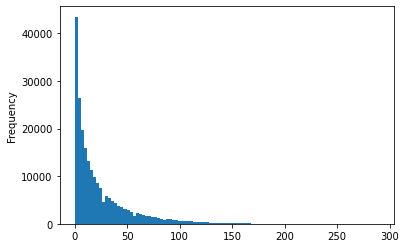

In [38]:
pd.Series(picked_l).plot.hist(bins=100)

In [107]:
dl_tst = DataLoader(ds_tst, batch_size=2, shuffle=False, collate_fn=mind_collate_fn)

In [175]:
m_tst = P_S_Network(len(ds_tst.user_d)+1, len(ds_tst.item_d)+1, 100)

In [176]:
u, r, r_mask, s = next(iter(dl_tst))
m_tst(u, r, r_mask, s)

torch.Size([2, 1, 2])
torch.Size([2, 87, 2])
torch.Size([2, 87])


In [27]:
emb_tst = nn.Embedding(num_embeddings=4, embedding_dim=2)

In [85]:
in_tst.size()

torch.Size([2, 1])